*Full project with complete code and datasets available on my Github [repository](https://github.com/ruthgn/Movie-Recommendation-System).*

With the ubiquity of mobile phone devices expanding by the day, Short Message
Services (SMS) or "texting" remains one of the most broadly utilized communication services. In any case, this has prompted an expansion in mobile phone attacks like SMS Spam. Fortunately, using natural language processing (NLP) concepts, we can train machines to conveniently remove these unsolicited messages for us. 

NLP combines machine learning techniques with text by using math and statistics to transform text into a format that machine learning algorithms can understand. This post lays out this process using Python's NLTK (Natural Language Toolkit) library. NLTK has a lot of useful features and is widely considered to be the standard for text processing in Python. 

We'll be using a dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) storing a collection of more than five thousand SMS text messages. Our goal is to build a spam detection filter that performs a classification task to separate spam messages from legitimate text messages (referred to as "ham"). Using these labeled examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.

## Getting Started

In [1]:
# Import NLTK library
import nltk

*Note*: The next step requires some manual input through NLTK's interactive shell.

In [2]:
# Download Stopwords Corpus package
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        Nainggolan\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


Let's go ahead and check out the data (i.e., read random anonymous text messages)!

In [3]:
# Use rstrip() plus a list comprehension 
# to get a list of all the lines of text messages
messages = [line.rstrip() for line in open ('smsspamcollection/SMSSpamCollection')]

In [4]:
# Number of messages in the dataset
print(len(messages))

5574


In [5]:
# Check out a random text(message no. 100) with its spam/ham status
messages[99]

'ham\tI see a cup of coffee animation'

In [6]:
# Another one
messages[42]

'spam\t07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow'

In [7]:
# Print first ten messages on the list and number them using enumerate
for msgNo, message in enumerate(messages[:10]):
    print(msgNo, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

From a preliminary view, we can already glimpse the format of some spam messages. Most are pretty standard- asking for money or proclaiming that the recipient has won an award of some sort. What we want to do is figure out how to differentiate between "spam" and "ham" messages.

Due to the spacing we can almost immediately tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message ("ham") or "spam", while the second column is the message itself (note that our numbers aren't part of the file, they are just from the **enumerate** call). Instead of parsing TSV manually using Python, we can automate the process using pandas!

In [8]:
# Import pandas
import pandas as pd

In [9]:
# Read data
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', 
                       sep='\t', names=['label', 'message'])

In [10]:
# Quick look at data
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

Let's check out the stats with some plots and pandas built-in methods.

In [11]:
# Descriptive statistics
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

As we continue our analysis we want to start thinking about the features we'll be using. Keep this in mind when you're doing any type of analysis that will lead to [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). Determining and creating features are a very large part of spam detection and natural language processing in general. The better our domain knowledge on the data, the better our ability to engineer more features from it.

In [13]:
# Detecting length of text messages and adding a length column
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Let's create some visualizations!

In [14]:
# Import data visualization libraries and set style
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

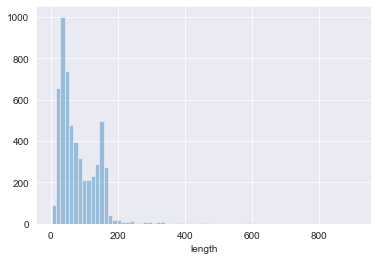

In [15]:
# Visualize message frequency vs. length
sns.distplot(messages['length'], kde=False, bins=70)

Looks like text length may be a good feature to think about. Let's try to investigate why the x-axis climbs up to one thousand--this must mean that there may be some really long messages.

In [16]:
# Length data descriptive statistics
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
# Locate the longest message
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Mmmmm....*okay*.

But let's focus back on the idea of trying to see if message length is a distinguishing feature between ham and spam:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E01C954A08>,
      dtype=object)

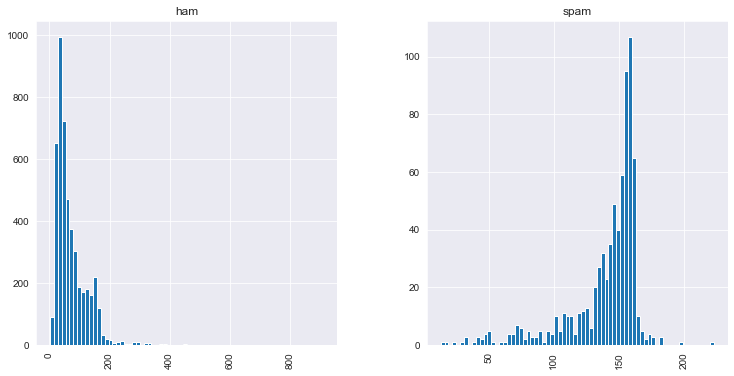

In [18]:
messages.hist(column='length', by='label', bins=70, figsize=(12,6))

Fantastic! At this point we can safely assume that message length is a good distinguishing feature. Text messages that are spam tend to be longer than those that are ham. Through our exploratory data analysis we discovered a trend that spam messages tend to have more characters (unless it's a love letter!).

We will now begin to process the data to eventually use with SciKit Learn.

## Text pre-processing

In order to allow machine learning algorithms to perform classification tasks on our textual data, we need to convert the corpus into a numerical feature vector. There are various ways of accomplishing this conversion, one of which is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

In this section, we'll convert the raw message (sequence of characters) into vectors (sequences of numbers). This step includes removing punctuation, splitting a message into its individual words, and removing very common words, including articles and prepositions (e.g., "the", "a", "be", "me", "is", etc.).

In [19]:
# Remove punctuations

# Use python's built-in 'string' library to list all the possible punctuation
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string
nopunc = ''.join(nopunc)

In [20]:
# Split a message into a list of words
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [21]:
# Import a list of english stopwords from NLTK
from nltk.corpus import stopwords

# Display examples of some stop words
stopwords.words('english')[0:20] 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [22]:
# Remove stop words
cleanMsg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
cleanMsg

['Sample', 'message', 'Notice', 'punctuation']

In [23]:
# Put all preprocessing steps in a function to apply to our DataFrame later on
def textProcess(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
# Display original DataFrame
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


What we need to do is "tokenize" these messages. Tokenization is the term used to describe the process of converting a normal text string into a list of tokens (words that we want to isolate for analysis). 

In [25]:
# Apply function for tokenization
messages['message'].head(5).apply(textProcess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

*Note*: There are many ways to normalize text data. The NLTK library contains numerous built-in tools and great documentation on other methods of normalization. We're going to focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

At this point, the messages have been converted into lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) which we need to convert into a vector form that SciKit Learn's algorithm models can work with.

We're going to convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

To summarize the three steps using the bag-of-words model:

1. Count how many times a word occurs in each message (known as term frequency)

2. Weigh the counts, so that frequent tokens are assigned a lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to subtract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1st dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [26]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [27]:
# Specify textProcess as analyzer. Warning: This might take a while
bowTransformer = CountVectorizer(analyzer=textProcess).fit(messages['message'])

In [28]:
# Print total number of vocabularies/words
print(len(bowTransformer.vocabulary_))

11425


In [29]:
# Take a random text message to get its bag-of-words counts as a vector 
msg4 = messages['message'][3]
print(msg4)

U dun say so early hor... U c already then say...


In [30]:
# Use bow_transformer
bow4 = bowTransformer.transform([msg4])

In [31]:
# Display vector representation of the text message
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


This means that there are seven unique words in our selected message (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and confirm which ones appear twice:

In [32]:
# Display the repeated words
print(bowTransformer.get_feature_names()[4068])
print(bowTransformer.get_feature_names()[9554])

U
say


Now we can use **.transform** on our Bag-of-Words (bow) transformer object and apply it to the entire DataFrame of messages. Check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix.

In [33]:
# Transform entire DataFrame of messages
messagesBow = bowTransformer.transform(messages['message'])

In [34]:
# Display bag-of-words counts for the entire SMS corpus
print('Shape of Sparse Matrix: ', messagesBow.shape)
# Checking non-zero occurences
print('Amount of Non-Zero occurences: ', messagesBow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [35]:
sparsity = (100.0) * messagesBow.nnz / (messagesBow.shape[0] * messagesBow.shape[1])
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


After the counting, weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using SciKit-learn's `TfidfTransformer`.

TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a measure often used for information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), meaning the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (i.e., the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear frequently but have little importance. Thus we need to weigh down frequent terms while scaling up unique terms, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

Below is a simple example:

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

Let's go ahead and do this in SciKit Learn:

In [36]:
# Import scikit-learn's TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

# Calculate our single random message bag-of-words TF-IDF weights
tfidfTransformer = TfidfTransformer().fit(messagesBow)
tfidf4 = tfidfTransformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [37]:
# Check the IDF (inverse document frequency) of the word "u"
print(tfidfTransformer.idf_[bowTransformer.vocabulary_['u']])
# Check the IDF (inverse document frequency) of the word "university"
print(tfidfTransformer.idf_[bowTransformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [38]:
# Transform the entire bag-of-words corpus into TF-IDF corpus at once
messagesTfidf = tfidfTransformer.transform(messagesBow)

*Note*: As is the case with how text data can be preprocessed, there are many ways data can be vectorized. These steps involve feature engineering and building a "pipeline". SciKit Learn's documentation on dealing with text data as well as the expansive collection of books on the general topic of NLP are great resources!

## Training our model

With messages represented as vectors, we can finally train our spam/ham classifier using a classification algorithm. We will be using the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier algorithm with scikit-learn.

In [39]:
from sklearn.naive_bayes import MultinomialNB
spamDetectModel = MultinomialNB().fit(messagesTfidf, messages['label'])

Let's try classifying our single random message and see how we do:

In [40]:
# Let's try classifying our single random message and checking how we do:
print('predicted:', spamDetectModel.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


Voila! We've developed a model that can classify spam vs ham messages!

In [41]:
spamDetectModel.predict(tfidf4)[0]

'ham'

## Model Evaluation

Now let's determine how well our model will do overall on the entire dataset. We'll begin by getting all the predictions:

In [42]:
messages['label'][98]

'ham'

In [43]:
# Get all predictions
pred = spamDetectModel.predict(messagesTfidf)
print(pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


We can use SciKit Learn's built-in classification report, which returns [precision, recall,](https://en.wikipedia.org/wiki/Precision_and_recall) [f1-score](https://en.wikipedia.org/wiki/F1_score), and a column for support (meaning how many cases supported that classification).

In [44]:
# Import classification_report
from sklearn.metrics import classification_report

# Display model "evaluation"
print (classification_report(messages['label'], pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



There are quite a few possible metrics for evaluating model performance. We can assume, for example, that the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".

In the above "evaluation",we tested the accuracy of our trained model on the same data we used for training. **In reality we should never actually evaluate on the same dataset we train our model on!** Such evaluation tells us nothing about the true predictive power of our model. If we simply remembered each example during training, the accuracy on training data would trivially be 100%, even though we wouldn't be able to classify any new messages.

The proper way to proceed is to add a step in which we split the data into a test set, where the model only ever sees the **test data** during its model fitting and parameter tuning. The **test data** is never used in any way. This means that our final evaluation on test data is representative of true predictive performance.

## Train Test Split

In [45]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.3)

# Display train/test split
print('Training Set:', len(msg_train))
print('Test Set:', len(msg_test))
print('Total:', len(msg_train) + len(msg_test))

Training Set: 3900
Test Set: 1672
Total: 5572


## Creating a Data Pipeline

Let's run our model again and predict from the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations needed to use the data in the future.

In [46]:
# Import pipeline
from sklearn.pipeline import Pipeline

In [47]:
# Store workflow into pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=textProcess)), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

We can pass data directly from the text messages and the pipeline will perform the pre-processing for us! We can treat it as a model/estimator API:

In [48]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function textProcess at 0x000001E016246558>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [49]:
predictions = pipeline.predict(msg_test)

In [50]:
# Display model evaluation
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1456
        spam       1.00      0.69      0.82       216

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



Displayed on the classification report is a true evaluation of our overall model. Look great....

Our model identified 100% of the real text messages in our test set. However,
it classified some spam messages as "ham", giving us a 95% rate in correct prediction of "ham" messages. The model succesfully detected 7 in 10 actual spam messages from the set.